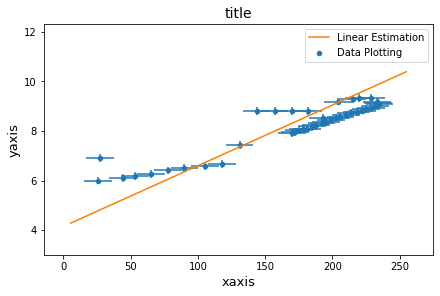

In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
from numpy.random import randn, rand
from matplotlib.pylab import close
import matplotlib.pyplot as plt
from sympy import *
#Input Sections
which = input('Which kind of data file are you choosing? csv or dat format?: ')
File = input('What is the name of your experimental data file?: ')
xaxisdata = input('Which Columns do you want to use for x axis to this Data plotting?')
yaxisdata = input('Which Columns do you want to use for y axis to this Data plotting?')
Title = input('What is the title of your Graph?: ')
Xlabel = input('What is the label of x axis?: ')
Ylabel = input('What is the label of y axis?: ')

#Importing basic data from a CSV-style experimental data file
xaxisdata = int(xaxisdata)
yaxisdata = int(yaxisdata)

if (which == 'csv'):
  df = pd.read_csv(File)
elif (which == 'dat'):
  df = pd.read_csv(File, sep='\s+')

df = df[df > 0]
num = len(df)
Xstd = df[df.columns[xaxisdata]].std()
Ystd = df[df.columns[yaxisdata]].std()

#Errors for direct observables
err_df0 = DataFrame(Xstd/np.sqrt(num -1), index=range(num), columns=[df.columns[xaxisdata], df.columns[yaxisdata]])
err_df1 =  DataFrame(Ystd/np.sqrt(num - 1), index=range(num), columns=[df.columns[xaxisdata], df.columns[yaxisdata]])

#Preparing Plotting Figure & Environment
fig, axes = plt.subplots(constrained_layout = True, facecolor = 'white')
axes.axis([df[df.columns[xaxisdata]].min() - 40, df[df.columns[xaxisdata]].max() + 40, df[df.columns[yaxisdata]].min() - 1, df[df.columns[yaxisdata]].max() + 1])

#Creating Scatter Graph of Experimental Data
df.plot(kind='scatter', x=df.columns[xaxisdata], y=df.columns[yaxisdata], xerr=err_df0, yerr=err_df1, ax=axes,label = 'Data Plotting')
axes.set_title(Title, fontsize = 14)
axes.set_xlabel(Xlabel, fontsize = 13)
axes.set_ylabel(Ylabel, fontsize = 13)

#Linear Estimation by using Least Squared Regression
df2 = df[df.columns[xaxisdata]] * df[df.columns[yaxisdata]]
df22 = pd.DataFrame({'Covariance': df2})
df3 = pd.concat([df, df22], axis = 1)
Cov = df22.mean() - df[df.columns[xaxisdata]].mean() * df[df.columns[yaxisdata]].mean()
a = Cov / (df[df.columns[xaxisdata]].std())**2
b = - a * df[df.columns[xaxisdata]].mean() + df[df.columns[yaxisdata]].mean()
x1 = np.linspace(df[df.columns[xaxisdata]].min() - 20, df[df.columns[xaxisdata]].max() + 20, 100)
l = a.values[0]
k = b.values[0]
errdf0 = err_df0.values[0][0]
errdf1 = err_df1.values[0][0]
y1 = l * x1 + k

#Error Propagation Law for arbitrary functions f(x, y)
import math
x, y = symbols("x y")
function = input("f(x,y)= ")
f = eval(function)
err_f = math.sqrt(errdf0**2 * (diff(f, x).subs([(x, df[df.columns[xaxisdata]].mean()), (y, df[df.columns[yaxisdata]].mean())]))**2 + errdf1**2 * (diff(f, y).subs([(x, df[df.columns[xaxisdata]].mean()), (y, df[df.columns[yaxisdata]].mean())]))**2)

#Creating a new columns for some indirect observables
def indirect(frame):
    return f.subs([(x, frame.iloc[xaxisdata]), (y, frame.iloc[yaxisdata])])
df['f(x, y)'] = df.apply(indirect, axis = 1)

#Plotting on the Scatter Graph
axes.plot(x1, y1, color = '#ff7f00', label = 'Linear Estimation')
axes.legend()
plt.savefig("figure.svg", transparent=True)

#Identification of the regression line
x = symbols('x')
eq = l * x + k

In [2]:
df

,Temperature,Resistance,"f(x, y)"
0,25.5,6.000,31.5000000000000
1,27.0,6.900,33.9000000000000
2,29.0,NaN,nan
3,35.0,NaN,nan
4,44.0,6.090,50.0900000000000
5,53.0,6.190,59.1900000000000
6,65.0,6.270,71.2700000000000
7,78.0,6.405,84.4050000000000
8,90.0,6.492,96.4920000000000
9,105.0,6.590,111.590000000000


In [3]:
eq

0.0244873658011095*x + 4.14916857861838

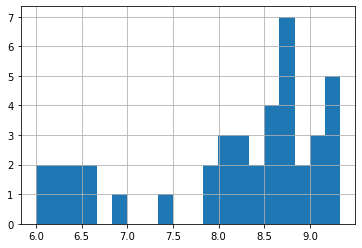

In [7]:
df['Cathode'].hist(bins = 100); # 基数の数を1000個にする  
plt.savefig("Cathode_histgram.png")

In [ ]:
import matplotlib.pyplot as plt
import math

#X axis value
x = [2.5,7.5,12.5,17.5,22.5,27.5,32.5,37.5,42.5,47.5]

#Y axis values and its errors
y = [248.4,265.7,276.1,304.2,342.5,318.3,353.7,390.5,462.2,487.4]
yerr = []

for i in range(len(y)):
    yerr.append(math.sqrt(y[i]))

#Plot data points
plt.errorbar(x,y,yerr=yerr,marker="+",linestyle='None')

#Decorations
plt.xlabel("Age")
plt.ylabel("Population [Milion]")
#plt.yscale('log')

#Display and save the resulting figure
plt.savefig("graph.png")
plt.show()